<a href="https://colab.research.google.com/github/sabiqsabry/bawt/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sys
sys.path.insert(0,'/content/drive/MyDrive/Colab Notebooks/bawt - chat behaviour analysis')  # Needed to import package in parent dir, remove this if you pip installed the package
import warnings
warnings.filterwarnings("ignore")
from soan.whatsapp import helper      # Helper to prepare the data
from soan.whatsapp import general     # General statistics
from soan.whatsapp import tf_idf      # To calculate TF-IDF
!pip install emoji==0.6.0
from soan.whatsapp import emoji       # To analyze emoji use
from soan.whatsapp import topic       # Topic modelling and summarization
from soan.whatsapp import sentiment   # Sentiment Analysis
from soan.whatsapp import wordcloud   # Create Word Clouds

from soan.colors   import colors      # Frequent Color Visualization

!pip install matplotlib==3.2.1
!pip install seaborn==0.10.1
!pip install Pillow==7.2.0
!pip install scipy==1.5.2
!pip install numpy==1.19.1
!pip install pandas==1.1.1
!pip install regex==2020.7.14
!pip install palettable==3.3.0
!pip install requests==2.22.0
!pip install scikit_learn==0.23.2
!pip install wordcloud==1.8.0
!pip install nltk==3.5
!pip install vaderSentiment==3.3.2

%matplotlib inline

%load_ext autoreload
%autoreload 2

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in

In [30]:
df = helper.import_data('/content/drive/MyDrive/Colab Notebooks/bawt - chat behaviour analysis/chat/User 6/WhatsApp Chat with Lela.txt')
df = helper.preprocess_data(df)

# Change labels for anonymization - Leave this at False
if False:
    user_labels = {old: new for old, new in zip(sorted(df.User.unique()), ['User', 'Me'])}
    df.User = df.User.map(user_labels)

In [31]:
general.print_users(df)

#############
##  Users  ##
#############

Lela
H


In [32]:
user = "User"
language = "English"

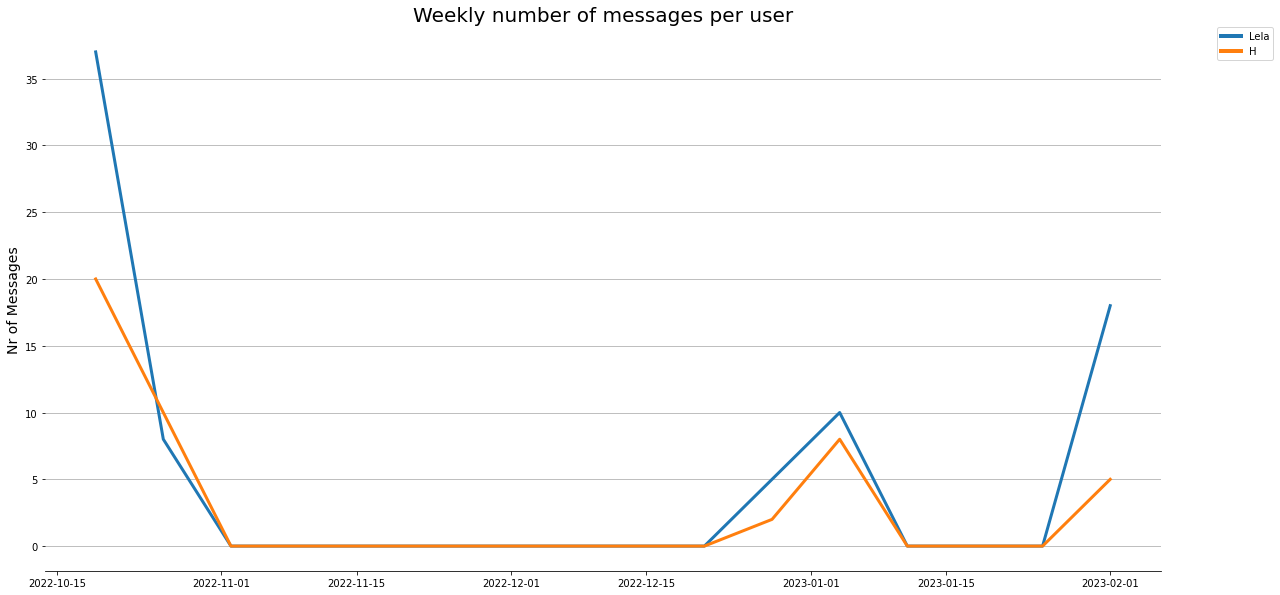

In [33]:
general.plot_messages(df, colors=None, trendline=False, savefig=False, dpi=100)

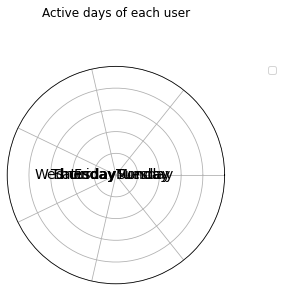

In [34]:
general.plot_day_spider(df, colors=None, savefig=False, dpi=100)

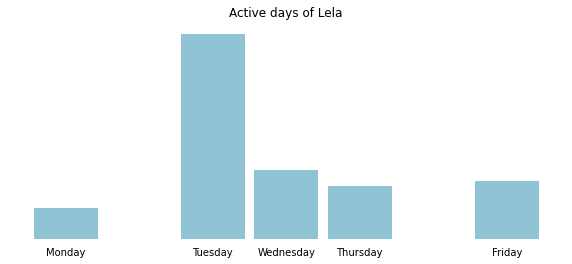

In [36]:
general.plot_active_days(df, savefig=False, dpi=100, user='Lela')

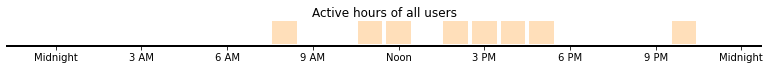

In [37]:
general.plot_active_hours(df, color='#ffdfba', savefig=False, dpi=100, user='All')

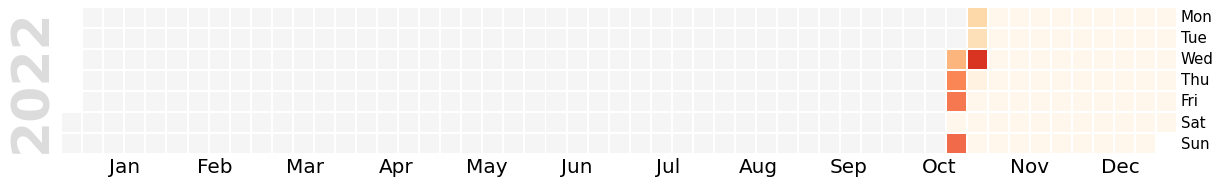

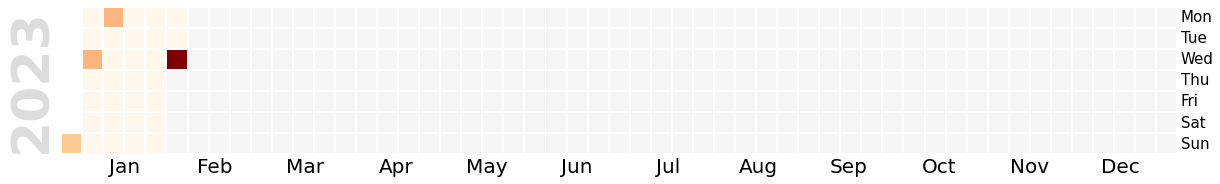

In [38]:
import pandas as pd
years = set(pd.DatetimeIndex(df.Date.values).year)

for year in years:
    general.calendar_plot(df, year=year, how='count', column='index')

In [39]:
general.print_timing(df)

#####################################
##  Avg. Response Time in Minutes  ##
#####################################

Lela:                         88.9
H:                            119.0

##############################
##  Nr. Initiated Messages  ##
##############################

H:                            1		(2.22% of all messages)
Lela:                         1		(1.28% of all messages)


In [40]:
counts = tf_idf.count_words_per_user(df, sentence_column="Message_Only_Text", user_column="User")
counts = tf_idf.remove_stopwords(counts, language='english', column="Word")

In [41]:
unique_words = tf_idf.get_unique_words(counts, df, version = 'C')

In [42]:
tf_idf.print_users(df)

#############
##  Users  ##
#############

Lela
H


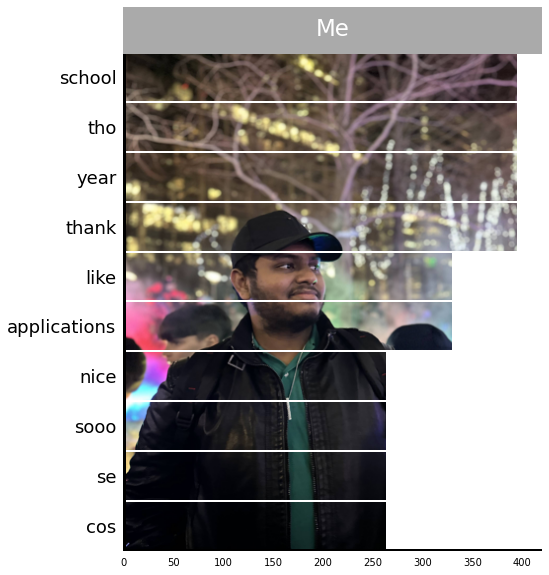

In [47]:
tf_idf.plot_unique_words(unique_words, 
                         user='Lela', 
                         image_path='/content/drive/MyDrive/Colab Notebooks/bawt - chat behaviour analysis/images/IMG_6435.jpg', # use '../images/mask.png' to use the standard image
                         image_url=None, 
                         title="Me", 
                         title_color="white", 
                         title_background='#AAAAAA', 
                         width=400, 
                         height=500)

In [65]:
# https://github.com/pandas-dev/pandas/issues/17892
temp = df[['index', 'Message_Raw', 'User', 'Message_Clean', 'Message_Only_Text']].copy()
temp = emoji.prepare_data(temp)

# Count all emojis
counts = emoji.count_emojis(temp, non_unicode=True)

# Get unique emojis
list_of_words = [word for user in counts for word in counts[user]]
unique_emoji = emoji.get_unique_emojis(temp, counts, list_of_words)
del temp

In [66]:
emoji.print_stats(unique_emoji, counts)

#############################
### Unique Emoji (TF-IDF) ###
#############################

Lela
😩 1.746835443037975
😭 1.358649789029536
😩🏽🏽🏽 1.1645569620253164

H
🥺 3.4347826086956514
😢 3.4347826086956514
8p 3.4347826086956514

#########################
### Most Common Emoji ###
#########################

Lela
😭 13
❤ 4
😩 2

H
😭 5
❤ 2
🥺 1



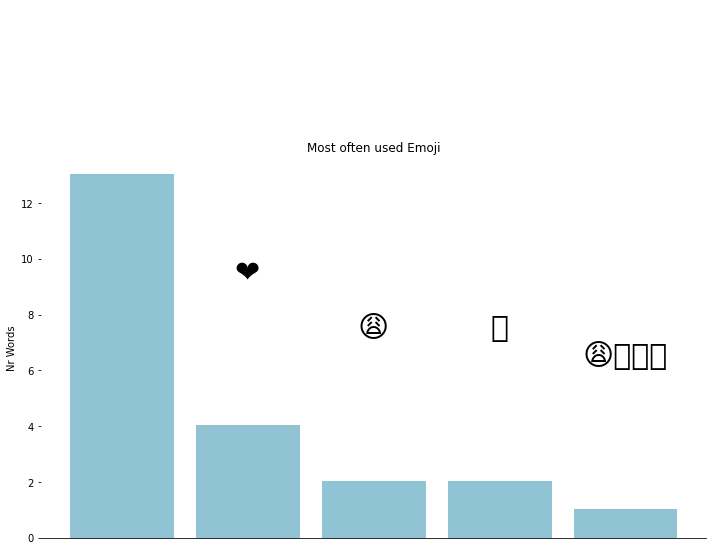

In [67]:
emoji.plot_counts(counts, user = "Lela")

In [68]:
topic.topics(df, model='lda', language="english")

############
### Lela ###
############


Topics in lda model:
Topic #0: applications apparently gcse going half term chance
Topic #1: okay se im yeah one email sorry
Topic #2: year go rest got look hope im
Topic #3: school xx wednesday grammar thank like next
Topic #4: tho awww even nice thank break youu

#########
### H ###
#########


Topics in lda model:
Topic #0: program definitely busy ive got omg space
Topic #1: think much space teaching got genuinely thats
Topic #2: evening came home parents okay send ive
Topic #3: omg thats send im ill genuinely please
Topic #4: ive ur really good let definitely ill



In [69]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()
df['Sentiment'] = df.apply(lambda row: analyser.polarity_scores(row.Message_Clean)["compound"], 1)

In [70]:
sentiment.print_avg_sentiment(df)

			#######################
			## Average Sentiment ##
			#######################
Lela:                         		0.137
H:                            		0.091





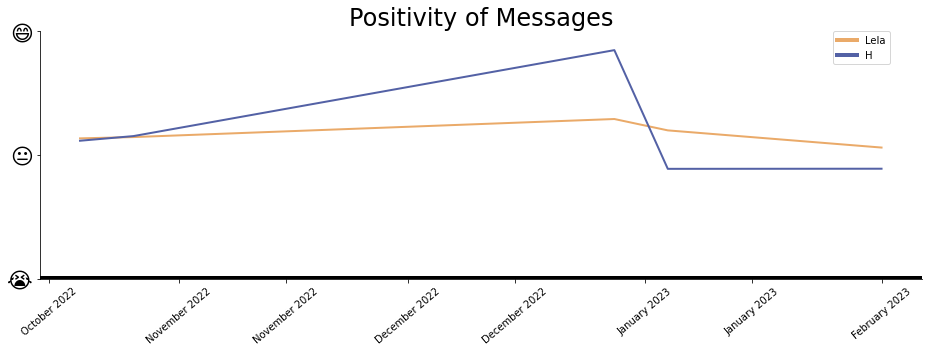

In [72]:
sentiment.plot_sentiment(df, colors=['#EAAA69','#5361A5'], savefig=False)

In [57]:
counts = tf_idf.count_words_per_user(df,sentence_column="Message_Only_Text",user_column="User")
counts = tf_idf.remove_stopwords(counts, language="english", column="Word")
words = counts[["Word", "Lela"]].set_index('Word').to_dict()["Lela"]

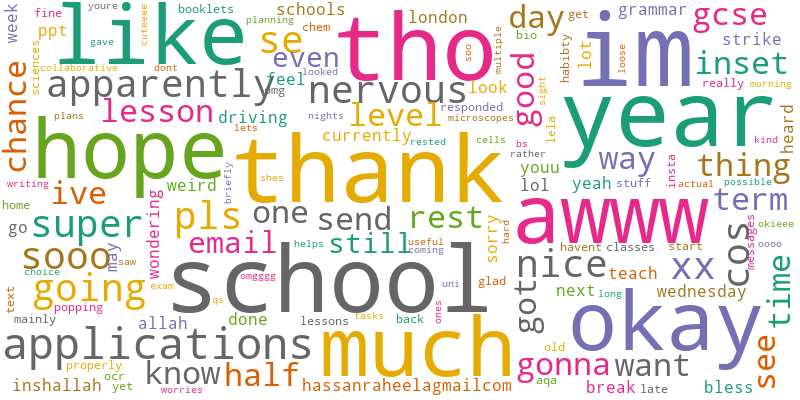

In [58]:
wordcloud.create_wordcloud(words,random_state=42,
                           max_words=1000, max_font_size=50, scale=2, 
                           normalize_plurals=False, relative_scaling = 0.5)